<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [247]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [248]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [249]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

Для ознакомления с признаками и их структурой, основными статистическими параметрами выведем информацию, содержащуюся в табл. vacancies

In [250]:
# текст запроса
query_1 = f'''select *  
                FROM public.vacancies
            '''    

In [251]:
# результат запроса
hh_df = pd.read_sql_query(query_1, connection)
display(hh_df.head()) 

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740


In [252]:
display(hh_df.info()) # информация о числе непустых значений в столбцах и их типах (табл. vacancies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49197 entries, 0 to 49196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49197 non-null  int64  
 1   name         49197 non-null  object 
 2   key_skills   40741 non-null  object 
 3   schedule     49197 non-null  object 
 4   experience   49197 non-null  object 
 5   employment   49197 non-null  object 
 6   salary_from  21485 non-null  float64
 7   salary_to    12690 non-null  float64
 8   area_id      49197 non-null  int64  
 9   employer_id  49197 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.8+ MB


None

In [253]:
display(hh_df.describe()) # статистическая информация о числовых столбцах (табл. vacancies) 

,id,salary_from,salary_to,area_id,employer_id
count,4.919700e+04,21485.000000,12690.000000,49197.000000,4.919700e+04
mean,5.535701e+07,71064.657901,110536.741923,378.184727,1.817791e+06
std,4.215213e+06,56646.897132,89104.795997,746.274918,1.954087e+06
min,6.555939e+06,30.000000,60.000000,1.000000,6.000000e+00
25%,5.465343e+07,35000.000000,50000.000000,12.000000,6.577200e+04
50%,5.512157e+07,50000.000000,80000.000000,72.000000,1.045513e+06
75%,5.544978e+07,90000.000000,150000.000000,159.000000,3.153012e+06
max,6.619644e+07,1000000.000000,1000000.000000,6458.000000,8.906438e+06


In [254]:
display(hh_df.describe(include = ["object"])) # статистическая информация о столбцах типа "object" (табл. vacancies)

,name,key_skills,schedule,experience,employment
count,49197,40741,49197,49197,49197
unique,21223,31218,5,4,4
top,Системный администратор,1С программирование,Полный день,От 1 года до 3 лет,Полная занятость
freq,1761,94,36424,26152,46069


# Юнит 3. Предварительный анализ данных

1 Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [255]:
# текст запроса
query_3_1 = f'''SELECT COUNT(id) AS cnt_vacancies
                FROM public.vacancies
            '''    

In [256]:
# результат запроса
hh_df_3_1 = pd.read_sql_query(query_3_1, connection)
print(f'Количество вакансий в нашей базе (табл. vacancies): {hh_df_3_1.iloc[0,0]}')

Количество вакансий в нашей базе (табл. vacancies): 49197


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



2 Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [257]:
# текст запроса
query_3_2 = f'''SELECT COUNT(id) AS cnt_employers
                FROM public.employers
            '''    

In [258]:
# результат запроса
hh_df_3_2 = pd.read_sql_query(query_3_2, connection)
print(f'Количество работодателей в нашей базе (табл. employers): {hh_df_3_2.iloc[0,0]}')

Количество работодателей в нашей базе (табл. employers): 23501


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



3 Посчитате с помощью запроса количество регионов (таблица areas).

In [259]:
# текст запроса
query_3_3 = f'''SELECT COUNT(id) AS cnt_areas
                FROM public.areas
            '''   

In [260]:
# результат запроса
hh_df_3_3 = pd.read_sql_query(query_3_3, connection)
print(f'Количество регионов в нашей базе (табл. areas): {hh_df_3_3.iloc[0,0]}')

Количество регионов в нашей базе (табл. areas): 1362


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



4 Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [261]:
# текст запроса
query_3_4 = f'''SELECT COUNT(id) AS cnt_industries
                FROM public.industries
            '''   

In [262]:
# результат запроса
hh_df_3_4 = pd.read_sql_query(query_3_4, connection)
print(f'Количество сфер деятельности в нашей базе (табл. industries): {hh_df_3_4.iloc[0,0]}')

Количество сфер деятельности в нашей базе (табл. industries): 294


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



***

### **Выводы по предварительному анализу данных**

В нашей базе представлено достаточно большое количество  вакансий (49 197 позиций), позволяющее подобрать необходимую для соискателя - в соответствии с его требованиями. 

Количество работодателей составляет 23 501, что свидетельствует о широком спектре возможностей в плане поиска подходящего места работы в  связи с наличием различных требований и условий труда со стороны работодателей.

Касательно географии представленных в базе вакансий: количество регионов составляет 1 362, что позволяет найти с учетом требований соискателя работу по месту проживания, как вариант, с удаленным типом занятости в других регионах, так и с возможностью переезда, командировок.  

Разнообразие вакансий в плане сфер деятельности (294 позиции) открывает также возможность подбора вакансий для соискателя с учетом имеющихся у него знаний/опыта в определенной области, либо интересующее направление в плане дальнейшего освоения и саморазвития.

Проведенный предварительный анализ дает представление об общем количестве значений рассмотренных признаков, без выявления особенностей внутреннего распределения указанных характеристик.

# Юнит 4. Детальный анализ вакансий

1 Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [263]:
# текст запроса
query_4_1 = f'''SELECT 
                     a.name AS area, 
                     COUNT(v.id) AS cnt_vacancies
              FROM public.areas a 
              JOIN  public.vacancies v ON v.area_id = a.id
              GROUP BY area
              ORDER BY cnt_vacancies DESC
              '''    

In [264]:
# результат запроса
hh_df_4_1 = pd.read_sql_query(query_4_1, connection)
display(hh_df_4_1)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,area,cnt_vacancies
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2 Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [265]:
# текст запроса
query_4_2 = f'''SELECT COUNT(id) AS cnt_vacancies
              FROM public.vacancies 
              WHERE salary_from IS NOT NULL or salary_to IS NOT NULL
              '''    

In [266]:
# результат запроса
hh_df_4_2 = pd.read_sql_query(query_4_2, connection)
print(f'Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой: {hh_df_4_2.iloc[0,0]}')

Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой: 24073


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



3 Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [267]:
# текст запроса
query_4_3 = f'''SELECT 
                      ROUND(AVG(salary_from)) AS AVG_salary_from,
                      ROUND(AVG(salary_to)) AS AVG_salary_to
              FROM public.vacancies  
              '''    

In [268]:
# результат запроса
hh_df_4_3 = pd.read_sql_query(query_4_3, connection)
display(hh_df_4_3)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,avg_salary_from,avg_salary_to
0,71065.0,110537.0


Для возможности более корректной инерпретации полученных средних значений проведем расчет медианы указанных показателей (для самоконтроля сравним результаты с полученными в таблице по основным статистическим данным) 

In [269]:
print(f'Медиана для нижней границы зарплатной вилки: {hh_df["salary_from"].median()} руб.')
print(f'Медиана для верхней границы зарплатной вилки: {hh_df["salary_to"].median()} руб.')

Медиана для нижней границы зарплатной вилки: 50000.0 руб.
Медиана для верхней границы зарплатной вилки: 80000.0 руб.


4 Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [270]:
# текст запроса
query_4_4 = f'''SELECT DISTINCT
                              schedule, 
                              employment, 
                              COUNT(id) AS cnt_vacancies
                FROM public.vacancies 
                GROUP BY schedule, employment
                ORDER BY cnt_vacancies DESC 
              '''    

In [271]:
# результат запроса
hh_df_4_4 = pd.read_sql_query(query_4_4, connection)
display(hh_df_4_4)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,schedule,employment,cnt_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5 Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [272]:
# текст запроса
query_4_5 = f'''SELECT experience
                FROM public.vacancies  
                GROUP BY experience
                ORDER BY COUNT(id)  
              '''    

In [273]:
# результат запроса
hh_df_4_5 = pd.read_sql_query(query_4_5, connection)
display(hh_df_4_5)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

Для более наглядного представления полученных данных о количестве вакансий с различными вариантами требуемого опыта работы построим круговую диаграмму

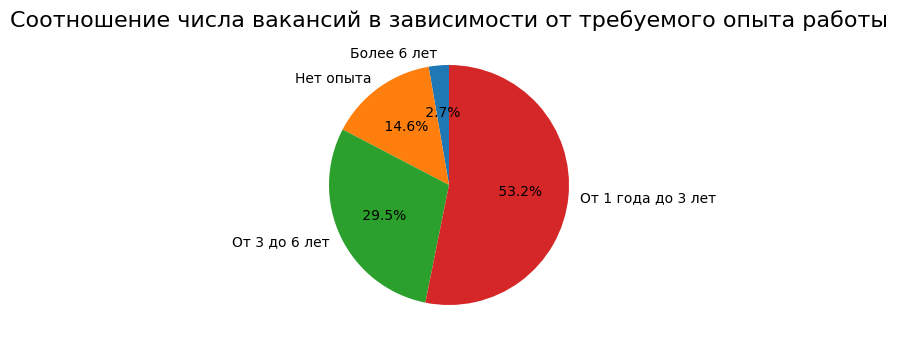

In [274]:
label_names = ["Более 6 лет", "Нет опыта", "От 3 до 6 лет", "От 1 года до 3 лет"]
df = hh_df["experience"].value_counts(ascending = True)

fig_1 = plt.figure(figsize = (6, 3))
ax = fig_1.add_axes((1, 1, 1, 1))
pie = ax.pie(
    df,
    autopct = " %1.1f%% ",
    startangle = 90,
    labels = label_names
)
title = ax.set_title('Cоотношение числа вакансий в зависимости от требуемого опыта работы', fontsize=16)
plt.show(pie)

### **Выводы по детальному анализу вакансий**

Детальный анализ вакансий позволил более точно проанализировать особенности распределения исследуемых признаков. 

1 Так, при изучении территориальной локализации вакансий было выявлено, что наибольшее число предложений - в крупных городах, с высокими показателями по численности населения, где в большей степени ощущается нехватка кадров в связи с достаточно большим количеством работодателей в сравнении с менее крупными регионами. В тройку лидеров вошли Москва, Санкт-Петербург и Минск. 

2 Хотелось бы ометить, что один из важнейших показателей в плане поиска соответствующей вакансии - заработная плата. В нашей базе данных заполнено хотя бы одно из двух полей с зарплатой у 24 073 вакансий, что составляет примерно половину от общего числа (49%). Этот фактор может выступить одной из негативных предпосылок, не позволяющих сразу отобрать интересующие соискателя вакансии.

3 При расчете средних значений для нижней и верхней границы зарплатной вилки были получены следующие данные: 71 065 руб. и 110 537 руб. соответственно, но при их сопоставлении с медианой была выявлена существенная разница. Так, медиана для нижней и верхней границы зарплатной вилки - 50 000 руб. и 80 000 руб.; данные показатели наиболее объективно отображают внутреннее распределение рассмотренных признаков, т.к. в меньшей степени подвержены влиянию аномальных значений.

4 При выявлении наиболее популярных сочетаний типа рабочего графика и типа трудоустройства в имеющихся вакансиях абсолютное большинство принадлежит варианту "полный день - полная занятость"	(72% от общего числа вакансий), далее вариант "удаленная работа - полная занятость"	(16%), значительно ниже доля от общего числа вакансий у сочетания "гибкий график	- полная занятость" (3%). Для других вариантов этот процент еще ниже. 

На основе полученных данных можно сделать вывод, что большинство работодателей ищут специалистов именно с полной занятостью, предлагая вакансии в качестве основного места работы; при этом тип рабочего графика может варьироваться, но лидерующие позиции у варианта "полный день". 

Особенности сформировавшегося на текущий момент рынка труда, связанные с влиянием как внешних факторов, так и внутренних особенностей отдельных вакансий,  позволяют организовывать также рабочий график по типу "удаленной работы" в сочетании с полной занятостью. Данный вариант дает возможность рассмотрения вакансий в других регионах, тем самым значительно расширяя зону поиска.

5 Наличие в базе вакансий с различным требуемым опытом позволяет найти работу в необходимой сфере как специалистам с уже имеющимся опытом, так и "новичкам", без опыта работы.

Хотелось бы отметить, что абсолютное большинство в нашей базе принадлежит вакансиям с небольшим требуемым опытом работы - от 1 года до 3 лет (53.2% от общего числа вакансий); данный сегмент, как правило, ориентирован на соискателей, желающих улучшить первоначальные условия труда, в том числе и повысить заработную плату, и нацеленных на дальнейшее саморазвитие и карьерный рост. 

Сегмент без опыта работы (14.6%) направлен на привлечение, как правило, специалистов начального уровня, с необходимым минимальным первоначальным запасом знаний/навыков. Наличие достаточно большого количества подобных вакансий открывает возможность для вхождения соискателей в выбранную отрасль и является неоспоримым преимуществом имеющейся базы вакансий. Также подчеркнем, что среди вакансий есть сегмент предложений, позволяющих пройти стажировку в выбранных компаниях, что также является отличной возможностью для начинающих специалистов.

# Юнит 5. Анализ работодателей

1 Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [275]:
# текст запроса
query_5_1 = f'''SELECT e.name AS employer
                      --COUNT(v.id) AS cnt -- столбец может быть выведен для получения количественных данных 
              FROM public.employers e 
              JOIN  public.vacancies v ON v.employer_id = e.id
              GROUP BY employer
              ORDER BY COUNT(v.id) DESC
              LIMIT 5
              '''   

In [276]:
# результат запроса
hh_df_5_1 = pd.read_sql_query(query_5_1, connection)
display(hh_df_5_1)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,employer
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2 Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [277]:
# текст запроса
query_5_2 = f'''SELECT
                     a.name AS area_name,
                     COUNT(e.id) AS cnt_employers,
                     COUNT(v.id) AS cnt_vacancies
              FROM public.areas a 
              LEFT JOIN  public.employers e ON a.id = e.area
              LEFT JOIN  public.vacancies v ON a.id = v.area_id
              WHERE v.id is null
              GROUP BY area_name
              ORDER BY cnt_employers DESC
              '''   

In [278]:
# результат запроса
hh_df_5_2 = pd.read_sql_query(query_5_2, connection)
display(hh_df_5_2)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,area_name,cnt_employers,cnt_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3 Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [279]:
# текст запроса
query_5_3 = f'''SELECT
                     e.name AS employers_name,
                     COUNT(DISTINCT(v.area_id)) AS cnt_areas
              FROM public.employers e 
              JOIN public.vacancies v ON e.id = v.employer_id
              GROUP BY employers_name 
              ORDER BY cnt_areas DESC
              '''   

In [280]:
# результат запроса
hh_df_5_3 = pd.read_sql_query(query_5_3, connection)
display(hh_df_5_3)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,employers_name,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4 Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [281]:
# текст запроса
query_5_4 = f'''SELECT COUNT(e.id)
                FROM public.employers e 
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id -- соединяем необходимые таблицы через табл.employers_industries
                LEFT JOIN public.industries i ON ei.industry_id = i.id
                WHERE ei.employer_id IS NULL 
              '''   

In [282]:
# результат запроса
hh_df_5_4 = pd.read_sql_query(query_5_4, connection)
print(f'Количество работодателей, у которых не указана сфера деятельности: {hh_df_5_4.iloc[0,0]}')

Количество работодателей, у которых не указана сфера деятельности: 8419


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



5 Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [283]:
# текст запроса
query_5_5 = f'''SELECT e.name AS employers_name
                FROM public.employers e 
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id  -- соединяем необходимые таблицы через табл.employers_industries
                LEFT JOIN public.industries i ON ei.industry_id = i.id
                GROUP BY employers_name
                HAVING COUNT(i.id) = 4
                ORDER BY employers_name
                OFFSET 2 LIMIT 1    
              '''   

In [284]:
# результат запроса
hh_df_5_5 = pd.read_sql_query(query_5_5, connection)
print(f'Название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности: {hh_df_5_5.iloc[0,0]}')

Название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности: 2ГИС


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



6 С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [285]:
# текст запроса
query_5_6 = f'''SELECT COUNT(e.id)
                FROM public.employers e 
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id -- соединяем необходимые таблицы через табл.employers_industries
                LEFT JOIN public.industries i ON ei.industry_id = i.id
                WHERE i.name = 'Разработка программного обеспечения' 
              '''   

In [286]:
# результат запроса
hh_df_5_6 = pd.read_sql_query(query_5_6, connection)
print(f'Количество работодателей, у которых в качестве сферы деятельности указана "Разработка программного обеспечения": {hh_df_5_6.iloc[0,0]}')

Количество работодателей, у которых в качестве сферы деятельности указана "Разработка программного обеспечения": 3553


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



7 Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [287]:
# код для получения списка городов-милионников
table_1 = pd.read_html('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
df_city = table_1[1]
cities = list(df_city["Город"]) # преобразуем необходимый столбец в список
cities[cities.index('Воронеж[a]')] = 'Воронеж' # вносим изменения в полученный список
cities_tuple = tuple(cities) # преобразуем в кортеж


In [288]:
# текст запроса
query_5_7 = f'''SELECT 
                    a.name AS cities_name, 
                    COUNT(v.id) AS cnt_vacancies
                FROM public.vacancies v 
                LEFT JOIN public.areas a ON a.id = v.area_id 
                LEFT JOIN public.employers e ON v.employer_id = e.id 
                WHERE   e.name = 'Яндекс' AND a.name in {cities_tuple} -- обращаемся к кортежу (для проверки вхождения региона с целью его определения в качестве региона-миллионника)
                GROUP BY cities_name
               
                UNION ALL -- выполняем для добавления графы 'Total'
                
                select
                    'Total',
                    COUNT(v.id) AS cnt_vacancies
                FROM public.vacancies v
                LEFT JOIN public.areas a ON a.id = v.area_id 
                LEFT JOIN public.employers e ON v.employer_id = e.id 
                WHERE   e.name = 'Яндекс' AND a.name in {cities_tuple}
                ORDER BY cnt_vacancies
                '''   

In [289]:
# результат запроса
hh_df_5_7 = pd.read_sql_query(query_5_7, connection)
display(hh_df_5_7)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,cities_name,cnt_vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### **Выводы по анализу работодателей**

1 При проведении более детального анализа работодателей было выявлено, что в пятерку лидеров по количеству вакансий входят крупнейшие федеральные компании: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть. На их долю приходится 7.4% от общего числа вакансий при общем количестве работодателей 23 501. Подобная тенденция может быть связана как со сферой деятельности указанных компаний, их динамичным развитием с расширением рынка, в том числе выход на международные рынки, так и в принципе со значительным по численности персоналом компаний, разветвленной территориальной сетью представительств. 

2 К регионам с наибольшим количеством работодателей, где нет вакансий, относятся те регионы, в которых спрос в данной сфере значительно превышает предложение со стороны работодателей. В связи с этим целесообразно рассмотреть варианты трудоустройства для соискателей в других регионах с возможностью удаленной работы/переезда/командировок.    

3 Территориальное распределение вакансий у различных компаний, их представленность в регионах сильно отличаются. Так, лидерующие позиции по числу регионов, в которых работодатель публикует свои вакансии, занимает Яндекс; на втором месте находится компания Ростелеком. Данная тенденция может быть связана в принципе с большим количеством вакансий в данных компаниях, наличием территориальных подразделений, а также обусловлена нехваткой кадров в крупных городах и зарплатным фактором: как правило в регинах размер заработной платы ниже, чем в крупных городах.

4 Одним из факторов, также определяющим успешность поискового запроса вакансий для соискателей, является указание работодателем сферы деятельности, что связано с наличием у соискателей образования определенной направленности, возможно, опыта работы в указанной сфере, что будет способствовать более продуктивному решению поставленных задач. В имеющейся базе данных 8 419 работодателей (36% от общего числа) не указали свою сферу деятельности, что также может снизить эффективность подбора вакансий. 

5 Хотелось бы также отметить, что в имеющемся перечне вакансий есть и работодатели, которые указали несколько и более сфер деятельности, что, в свою очередь, значительно расширяет критерии поиска для соискателей, учитывая их индивидуальные особенности. 

6 При подсчете работодателей, у которых в качестве сферы деятельности указана "Разработка программного обеспечения", были получены следующие данные: число подобных компаний составляет 3 553 (15% от общего числа). Данная сфера деятельности в большей степени ориентирована на IT-специалистов - разработчиков ПО. Но подобные навыки являются огромным плюсом для специалиста, решившего перейти в сферу DS.

7 Анализ имеющихся вакансий Яндекса, крупнейшего работодателя в нашей базе данных по общему количеству вакансий и по числу регионов с опубликованными вакансиями, в разрезе представленности в регионах-миллионниках показал, что на их долю приходится 25% от общего числа вакансий компании (485 позиций). Данный показатель подтверждает тенденцию в развитии компании в плане расширения региональной представленности кадров, обусловленную как  расширением штата внутри страны, так и в международных представительствах, с возможностью найма с удаленным типом рабочего графика, так и нехваткой квалифицированных специалистов, разницой в заработной плате в крупных городах и регионах.       



# Юнит 6. Предметный анализ

1 Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [290]:
# текст запроса
query_6_1 = f'''SELECT COUNT(id)
                FROM public.vacancies 
                WHERE lower(name) LIKE '%data%' OR lower(name) LIKE '%данн%'
              '''  

In [291]:
# результат запроса
hh_df_6_1 = pd.read_sql_query(query_6_1, connection)
print(f'Количество вакансий, имеющих отношение к данным: {hh_df_6_1.iloc[0,0]}')

Количество вакансий, имеющих отношение к данным: 1771


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



2 Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [292]:
# текст запроса
query_6_2 = f'''SELECT COUNT(id)
                FROM public.vacancies v
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') AND
                       (LOWER(name) LIKE '%junior%' OR
                       experience = 'Нет опыта' OR 
                       employment = 'Стажировка')
              '''  

In [293]:
# результат запроса
hh_df_6_2 = pd.read_sql_query(query_6_2, connection)
print(f'Количество вакансий для начинающего дата-сайентиста: {hh_df_6_2.iloc[0,0]}')

Количество вакансий для начинающего дата-сайентиста: 51


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



Рассчитаем общее количество вакансий для специалиста DS

In [294]:
# текст запроса
query_6_2_1 = f'''SELECT COUNT(id)
                FROM public.vacancies v
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%')             
                '''  

In [295]:
# результат запроса
hh_df_6_2_1 = pd.read_sql_query(query_6_2_1, connection)
print(f'Общее количество вакансий для дата-сайентиста: {hh_df_6_2_1.iloc[0,0]}')

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



Общее количество вакансий для дата-сайентиста: 480


3 Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [296]:
# текст запроса
query_6_3 = f'''SELECT COUNT(id)
                FROM public.vacancies
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') AND
                       (key_skills ILIKE '%SQL%' or key_skills ILIKE '%postgres%')
              '''  

In [297]:
# результат запроса
hh_df_6_3 = pd.read_sql_query(query_6_3, connection)
print(f'Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres: {hh_df_6_3.iloc[0,0]}')

Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres: 201


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



4 Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [298]:
# текст запроса
query_6_4 = f'''SELECT COUNT(id)
                FROM public.vacancies
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') AND
                       key_skills ILIKE '%Python%'
              '''  

In [299]:
# результат запроса
hh_df_6_4 = pd.read_sql_query(query_6_4, connection)
print(f'Количество вакансий для DS, в которых в качестве ключевого навыка указан Python: {hh_df_6_4.iloc[0,0]}')

Количество вакансий для DS, в которых в качестве ключевого навыка указан Python: 351


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



5 Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [300]:
# текст запроса
query_6_5 = f'''SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1), 2) -- количество ключевых навыков на 1 больше, чем знаков-разделителей
                FROM public.vacancies 
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') AND
                       key_skills IS NOT NULL
                       
              '''  

In [301]:
# результат запроса
hh_df_6_5 = pd.read_sql_query(query_6_5, connection)
print(f'Количество ключевых навыков, указанных в среднем в вакансиях для DS: {hh_df_6_5.iloc[0,0]}')

Количество ключевых навыков, указанных в среднем в вакансиях для DS: 6.41


c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



6 Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [302]:
# текст запроса
query_6_6 = f'''select
                    DISTINCT experience,
                    ROUND(AVG(COALESCE((salary_from+salary_to)/2, salary_from, salary_to)), 0) AS mean_salary
                FROM public.vacancies
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') AND
                       (salary_from IS NOT NULL or salary_to IS NOT NULL) AND
                       experience IS NOT NULL
                GROUP BY experience       
                       
              '''  

In [303]:
# результат запроса
hh_df_6_6 = pd.read_sql_query(query_6_6, connection)
display(hh_df_6_6)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,experience,mean_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Рассчитаем среднюю заработную плату для всех вакансий, имеющих непосредственное отношение к данным, в зависимости от опыта работы

In [304]:
# текст запроса
query_6_6_1 = f'''select
                    DISTINCT experience,
                    ROUND(AVG(COALESCE((salary_from+salary_to)/2, salary_from, salary_to)), 0) AS mean_salary
                FROM public.vacancies
                WHERE lower(name) LIKE '%data%' OR lower(name) LIKE '%данн%' AND
                     (salary_from IS NOT NULL or salary_to IS NOT NULL) AND
                      experience IS NOT NULL
                GROUP BY experience       
                ORDER BY mean_salary        
              ''' 

In [305]:
# результат запроса
hh_df_6_6_1 = pd.read_sql_query(query_6_6_1, connection)
display(hh_df_6_6_1)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,experience,mean_salary
0,Нет опыта,66117.0
1,От 1 года до 3 лет,96505.0
2,От 3 до 6 лет,185184.0
3,Более 6 лет,257713.0


***

### **Выводы по предметному анализу**

В используемой базе непосредственное отношение к данным имеют 1 771 вакансия (3,6% от общего количества вакансий). Из них только 480 вакансий (чуть менее 1% от общего количества вакансий), которые будут, в первую очередь, предлагаться соискателям, претендующим на позицию Data Scientist. В связи с этим можно сделать вывод, что имеющаяся база предлагает достаточно небольшой выбор вакансий, связанных с этой должностью.

В качестве требований к претендентам работодатели также указывают ключевые навыки, наличие которых необходимо для получение положительного решения при рассмотрении вакансии. Так, в среднем в вакансиях по DS при округлении этого показателя до целочисленного значения указано 6 навыков. 

Основными ключевыми навыками являются - владение Python (73% от общего числа вакансий на позицию DS), SQL или postgres (42% от общего числа вакансий на позицию DS).

При расчете средней заработной платы специалиста DS в зависимости от имеющегося опыта работы были получены следующие результаты: для вакансий без опыта работы - 74 643 руб., от 1 года до 3 лет - 139 675 руб., от 3 до 6 лет - 243 115 руб. При сравнении указанных показателей со средней заработной платой для всех вакансий, имеющих непосредственное отношение к данным, наблюдаем большие значения для специалиста DS в  связи с востребованностью направления в различных сферах, динамичным развитием данной области, нехваткой квалифцированных специалистов.  

Проведем дополнительные исследования вакансий на должность "Data Scientist"

7 Выявим, в каких регионах в нашей базе представлены вакансии "Data Scientist"

In [306]:
# текст запроса
query_6_7 = f'''SELECT
                     a.name AS area, 
                     COUNT(v.id) AS cnt_vacancies
              FROM public.areas a 
              JOIN  public.vacancies v ON v.area_id = a.id
              WHERE (LOWER(v.name) LIKE '%data scientist%' OR
                     LOWER(v.name) LIKE '%data science%' OR
                     LOWER(v.name) LIKE '%исследователь данных%' OR
                     (v.name LIKE '%ML%' and v.name NOT ILIKE '%HTML%') OR
                     LOWER(v.name) LIKE '%machine learning%' OR
                     LOWER(v.name) LIKE '%машинн%обучен%') 
              GROUP BY area
              ORDER BY cnt_vacancies DESC
              '''   

In [307]:
# результат запроса
hh_df_6_7 = pd.read_sql_query(query_6_7, connection)
display(hh_df_6_7)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,area,cnt_vacancies
0,Москва,217
1,Санкт-Петербург,64
2,Новосибирск,23
3,Нижний Новгород,20
4,Казань,16
5,Алматы,16
6,Минск,9
7,Томск,8
8,Екатеринбург,7
9,Краснодар,6


8 Проанализируем, какое количество вакансий "Data Scientist" приходится на регионы-миллионники

In [308]:
# текст запроса
query_6_8 = f'''SELECT 
                    a.name AS cities_name, 
                    COUNT(v.id) AS cnt_vacancies
                FROM public.vacancies v 
                LEFT JOIN public.areas a ON a.id = v.area_id 
                LEFT JOIN public.employers e ON v.employer_id = e.id 
                WHERE (LOWER(v.name) LIKE '%data scientist%' OR
                     LOWER(v.name) LIKE '%data science%' OR
                     LOWER(v.name) LIKE '%исследователь данных%' OR
                     (v.name LIKE '%ML%' and v.name NOT ILIKE '%HTML%') OR
                     LOWER(v.name) LIKE '%machine learning%' OR
                     LOWER(v.name) LIKE '%машинн%обучен%')  AND
                     a.name in {cities_tuple}
                GROUP BY cities_name
                
                UNION ALL
                
                SELECT
                    'Total',
                    COUNT(v.id) AS cnt_vacancies
                FROM public.vacancies v 
                LEFT JOIN public.areas a ON a.id = v.area_id 
                LEFT JOIN public.employers e ON v.employer_id = e.id 
                WHERE (LOWER(v.name) LIKE '%data scientist%' OR
                     LOWER(v.name) LIKE '%data science%' OR
                     LOWER(v.name) LIKE '%исследователь данных%' OR
                     (v.name LIKE '%ML%' and v.name NOT ILIKE '%HTML%') OR
                     LOWER(v.name) LIKE '%machine learning%' OR
                     LOWER(v.name) LIKE '%машинн%обучен%') AND
                     a.name in {cities_tuple}
                
                ORDER BY cnt_vacancies
                '''  

In [309]:
# результат запроса
hh_df_6_8 = pd.read_sql_query(query_6_8, connection)
display(hh_df_6_8)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,cities_name,cnt_vacancies
0,Красноярск,1
1,Волгоград,1
2,Челябинск,1
3,Воронеж,2
4,Уфа,2
5,Омск,3
6,Пермь,5
7,Самара,5
8,Ростов-на-Дону,6
9,Краснодар,6


9 Выведем количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment) для вакансий "Data Scientist"

In [310]:
# текст запроса
query_6_9 = f'''SELECT DISTINCT 
                    schedule, 
                    employment, 
                    COUNT(id) AS cnt_vacancies
                FROM public.vacancies  
                WHERE LOWER(name) LIKE '%data scientist%' OR
                     LOWER(name) LIKE '%data science%' OR
                     LOWER(name) LIKE '%исследователь данных%' OR
                     (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                     LOWER(name) LIKE '%machine learning%' OR
                     LOWER(name) LIKE '%машинн%обучен%' 
                GROUP BY schedule, employment
                ORDER BY cnt_vacancies DESC 
              '''    

In [311]:
# результат запроса
hh_df_6_9 = pd.read_sql_query(query_6_9, connection)
display(hh_df_6_9)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,schedule,employment,cnt_vacancies
0,Полный день,Полная занятость,319
1,Удаленная работа,Полная занятость,110
2,Гибкий график,Полная занятость,37
3,Гибкий график,Частичная занятость,4
4,Удаленная работа,Частичная занятость,3
5,Гибкий график,Стажировка,2
6,Полный день,Стажировка,2
7,Удаленная работа,Проектная работа,2
8,Полный день,Частичная занятость,1


10 Рассмотрим распределение вакансий "Data Scientist" по указанному работодателем требуемому опыту работы

In [312]:
# текст запроса
query_6_10 = f'''SELECT experience,
                COUNT(id) AS cnt_vacancies
                FROM public.vacancies
                WHERE (LOWER(name) LIKE '%data scientist%' OR
                       LOWER(name) LIKE '%data science%' OR
                       LOWER(name) LIKE '%исследователь данных%' OR
                       (name LIKE '%ML%' and name NOT ILIKE '%HTML%') OR
                       LOWER(name) LIKE '%machine learning%' OR
                       LOWER(name) LIKE '%машинн%обучен%') 
                GROUP BY experience
                ORDER BY COUNT(id) DESC    
              '''  

In [313]:
# результат запроса
hh_df_6_10 = pd.read_sql_query(query_6_10, connection)
display(hh_df_6_10)

c:\Users\Misha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,experience,cnt_vacancies
0,От 1 года до 3 лет,223
1,От 3 до 6 лет,195
2,Более 6 лет,34
3,Нет опыта,28


# Общий вывод по проекту
Имеющаяся база, на первый взгляд, содержит достаточно большое количество вакансий с разнообразной географией, с достаточно большим перечнем работодателей, имеющим различные требования к соискателям. Хотелось бы отметить, что представленные данные с точки зрения их дальнейшей обработки плохо структурированы. В дальнейшем при размещении вакансий работодателем необходимо внести как можно больше полей с выбором параметров, значительно снизить долю заполняемых вручную.

Так, например, графа name в табл. areas содержит одновременно и названия стран, и названия регионов, и отдельных городов. В связи с этим нет возможности проанализировать распределение вакансий по странам для выявления работодателей, имеющих международные представительства; сгруппировать города внутри России, например, следующим образом - города-миллионники и другие - для выявления закономерностей в рассматриваемых группах.

Также присутствуют определенные нюансы в плане структурирования информации по работодателям, нет возможности сгруппировать их по численности сотрудников, по основной сфере деятельности для возможного дальнейшего анализа данных по выделенным группам.

Как было отмечено выше, в рамках исследования нам было необходимо подобрать предложения для претендентов именно на должность DS. Территориальное распределение вакансий в этом случае достаточно ограничено (вакансии представлены лишь в 51 регионе при общем числе регионов 1 362), из них 379 вакансий (79% от общего числа вакансий DS) приходится на регионы-миллионники.

При выявлении наиболее популярных сочетаний типа рабочего графика и типа трудоустройства для вакансий DS в имеющихся вакансиях абсолютное большинство принадлежит также варианту "полный день - полная занятость"	(67% от общего числа вакансий DS), для варианта "удаленная работа - полная занятость" показатели чуть выше, чем для данных по всем вакансиям, что можно объяснить спецификой рассматриваемого направления	(23 % от общего числа вакансий DS). При этом возможность стажировка указана лишь в 4 вакансиях.

При этом количество вакансий для начинающих специалистов в сфере DS также минимально (5,8% от общего числа вакансий DS), наиболее востребованы специалисты с опытом работы также от 1 года до 3 лет.

Таким образом, при применении дополнительных фильтров область поиска, соответсвующая каждому индивидуальному запросу соискателя, будет значительно уменьшена, и итоговое количество предложений по напрвлению DS может получиться совсем минимальным.

In [314]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [315]:
#закрываем соединение после окончания работы
connection.close()